## Aula 2: Manipulação de Dados


In [1]:
import pandas as pd
import numpy as np
import os
from zipfile import ZipFile
%matplotlib inline

In [ ]:
# df_identity = pd.read_csv('../datasets/train_identity.csv')
# df_transaction = pd.read_csv('../datasets/train_transaction.csv')

In [ ]:
# df_final = df_transaction.merge(df_identity, on = 'TransactionID', how = 'left')

In [ ]:
# with ZipFile('../datasets/microdados_enem_2019.zip') as z:
#     with z.open('DADOS/MICRODADOS_ENEM_2019.csv') as f:
#         microdados = pd.read_csv(f, sep=';', encoding='ISO-8859-1', usecols=['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA'])

In [ ]:
# microdados

In [ ]:
# microdados.shape

In [ ]:
# df_final.shape

### Concats e merges

In [3]:
df1 = pd.DataFrame({'A':[1,2,3],'B':[4,5,6],'C':[7,8,9]},index=['w','x','y'])
df2 = pd.DataFrame({'B':[1,2,3],'C':[4,5,6],'D':[7,8,9]},index=['x','y','z'])

In [4]:
df1

,A,B,C
w,1,4,7
x,2,5,8
y,3,6,9


In [5]:
df2

,B,C,D
x,1,4,7
y,2,5,8
z,3,6,9


In [8]:
df = pd.concat([df1, df2])
df

,A,B,C,D
w,1.0,4,7,NaN
x,2.0,5,8,NaN
y,3.0,6,9,NaN
x,NaN,1,4,7.0
y,NaN,2,5,8.0
z,NaN,3,6,9.0


In [9]:
df.loc['x']

,A,B,C,D
x,2.0,5,8,NaN
x,NaN,1,4,7.0


In [7]:
pd.concat([df1, df2], axis=1)

,A,B,C,B,C,D
w,1.0,4.0,7.0,NaN,NaN,NaN
x,2.0,5.0,8.0,1.0,4.0,7.0
y,3.0,6.0,9.0,2.0,5.0,8.0
z,NaN,NaN,NaN,3.0,6.0,9.0


In [10]:
pd.concat([df1, df2], join='inner')

,B,C
w,4,7
x,5,8
y,6,9
x,1,4
y,2,5
z,3,6


In [11]:
pd.concat([df1, df2], join='inner', axis=1)

,A,B,C,B,C,D
x,2,5,8,1,4,7
y,3,6,9,2,5,8


In [18]:
df3 = pd.DataFrame({'Paises':['Br','Pt','Ba'],'valor1':[1,2,3],"Valor2":[3,4,5]})
df4 = pd.DataFrame({'Paises':['Br','Pt','Bo'],'valor1':[1,2,3],"Valor4":[3,4,5]})

In [19]:
df3

,Paises,valor1,Valor2
0,Br,1,3
1,Pt,2,4
2,Ba,3,5


In [20]:
df4

,Paises,valor1,Valor4
0,Br,1,3
1,Pt,2,4
2,Bo,3,5


In [27]:
pd.merge(df3, df4, on='Paises', how='outer')

,Paises,valor1_x,Valor2,valor1_y,Valor4
0,Br,1.0,3.0,1.0,3.0
1,Pt,2.0,4.0,2.0,4.0
2,Ba,3.0,5.0,NaN,NaN
3,Bo,NaN,NaN,3.0,5.0


### Importando dados

In [4]:
filename = '../datasets/imoveis_Rio_de_Janeiro.csv'
df_imoveis_rj = pd.read_csv(filename, sep=';')
df_imoveis_rj

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
0,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
1,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
2,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
3,700,1,1.0,1.0,70,1,0,700000,99.0,10000.00
4,440,1,0.0,1.0,44,1,2,515000,99.0,11704.55
...,...,...,...,...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,7,270,680000,99.0,8500.00
1993,750,3,0.0,1.0,82,7,0,650000,99.0,7926.83
1994,700,3,1.0,1.0,100,7,0,629900,99.0,6299.00
1995,1850,3,1.0,2.0,166,7,330,1600000,99.0,9638.55


In [29]:
df = pd.read_csv(filename, sep=';', nrows=0)
df.columns

Index(['condominio', 'quartos', 'suites', 'vagas', 'area', 'bairro',
       'atualizacao', 'preco', 'distancia', 'pm2'],
      dtype='object')

In [30]:
pd.read_csv(filename, sep=';', nrows=100)

,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
0,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
1,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
2,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
3,700,1,1.0,1.0,70,1,0,700000,99.0,10000.00
4,440,1,0.0,1.0,44,1,2,515000,99.0,11704.55
...,...,...,...,...,...,...,...,...,...,...
95,200,3,1.0,1.0,109,1,0,798000,99.0,7321.10
96,700,3,1.0,2.0,97,1,1,1270000,99.0,13092.78
97,1400,3,1.0,1.0,140,1,19,2500000,99.0,17857.14
98,1600,3,3.0,2.0,126,1,0,1600000,99.0,12698.41


In [32]:
pd.read_csv(filename, sep=';', usecols=['condominio', 'quartos', 'suites', 'vagas', 'area', 'bairro'])

,condominio,quartos,suites,vagas,area,bairro
0,350,1,0.0,1.0,21,1
1,800,1,0.0,1.0,64,1
2,674,1,0.0,1.0,61,1
3,700,1,1.0,1.0,70,1
4,440,1,0.0,1.0,44,1
...,...,...,...,...,...,...
1992,1080,3,1.0,1.0,80,7
1993,750,3,0.0,1.0,82,7
1994,700,3,1.0,1.0,100,7
1995,1850,3,1.0,2.0,166,7


In [33]:
df_imoveis_rj.shape

(1997, 10)

In [13]:
pd.read_csv(filename, sep=';', header=None)

,0,1,2,3,4,5,6,7,8,9
0,condominio,quartos,suites,vagas,area,bairro,atualizacao,preco,distancia,pm2
1,350,1,0.0,1.0,21,1,1,340000,99.0,16190.48
2,800,1,0.0,1.0,64,1,0,770000,99.0,12031.25
3,674,1,0.0,1.0,61,1,1,600000,99.0,9836.07
4,700,1,1.0,1.0,70,1,0,700000,99.0,10000.0
...,...,...,...,...,...,...,...,...,...,...
1993,1080,3,1.0,1.0,80,7,270,680000,99.0,8500.0
1994,750,3,0.0,1.0,82,7,0,650000,99.0,7926.83
1995,700,3,1.0,1.0,100,7,0,629900,99.0,6299.0
1996,1850,3,1.0,2.0,166,7,330,1600000,99.0,9638.55


### Nan Values

In [40]:
#Drop nan
df = pd.DataFrame({'col1':[1,2,3,np.nan],
                   'col2':[np.nan,555,666,444],
                   'col3':['abc','def','ghi','xyz']})
df.head()

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [41]:
df.dropna()

,col1,col2,col3
1,2.0,555.0,def
2,3.0,666.0,ghi


In [42]:
df

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [43]:
# dropa linhas que tem valores nan, para dropar colunas, utilizar 'axis=1'
df.dropna(axis=1)

,col3
0,abc
1,def
2,ghi
3,xyz


In [49]:
df.dropna(subset=['col2']).dropna(axis=1)

,col2,col3
1,555.0,def
2,666.0,ghi
3,444.0,xyz


In [50]:
df

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,NaN,444.0,xyz


In [52]:
df.col2.mean()

555.0

In [57]:
# preencher valores nan
df.fillna(0)

,col1,col2,col3
0,1.0,0.0,abc
1,2.0,555.0,def
2,3.0,666.0,ghi
3,0.0,444.0,xyz


In [58]:
# verifica quais valores sao nulos

df.isna()

,col1,col2,col3
0,False,True,False
1,False,False,False
2,False,False,False
3,True,False,False


In [61]:
df.col2[0]

nan

In [60]:
pd.isna(df.col2[0])

True

In [63]:
df[~df.col1.isna()]

,col1,col2,col3
0,1.0,NaN,abc
1,2.0,555.0,def
2,3.0,666.0,ghi


### Covariancia/ Correlação

$Cov(x,y) = \frac{\sum{(x_i - \bar{x}) (y_i - \bar{y})}}{(n - 1)}$

$Corr(x,y) = \frac{Cov(x,y)}{\sigma_x \sigma_y}$

In [65]:
#read tinatic dataset
df_titanic = pd.read_csv('../datasets/titanic.csv')

In [66]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [67]:
df_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df_titanic.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [76]:
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 50)
pd.set_option('display.min_rows', 50)
pd.set_option('display.expand_frame_repr', True)

In [77]:
df_titanic.head(100)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


In [78]:
#covariancia
df_titanic.cov()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,66231.000000,-0.626966,-7.561798,138.696504,-16.325843,-0.342697,161.883369
Survived,-0.626966,0.236772,-0.137703,-0.551296,-0.018954,0.032017,6.221787
Pclass,-7.561798,-0.137703,0.699015,-4.496004,0.076599,0.012429,-22.830196
Age,138.696504,-0.551296,-4.496004,211.019125,-4.163334,-2.344191,73.849030
SibSp,-16.325843,-0.018954,0.076599,-4.163334,1.216043,0.368739,8.748734
Parch,-0.342697,0.032017,0.012429,-2.344191,0.368739,0.649728,8.661052
Fare,161.883369,6.221787,-22.830196,73.849030,8.748734,8.661052,2469.436846


In [79]:
#correlação
df_titanic.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


## VOLTAMOS AS 21:23

### Agrupando dados

In [81]:
# checa o tipo das variáveis
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [82]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [84]:
#Os valores por padrão são as medias, para altera-lo para soma utilize o comando aggfunc=np.mean 
#pivot table
df_pivot = pd.pivot_table(df_titanic, values='Survived', index='Pclass', columns='Sex')
df_pivot

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [90]:
df_pivot.reset_index()

Sex,Pclass,female,male
0,1,0.968085,0.368852
1,2,0.921053,0.157407
2,3,0.500000,0.135447


In [94]:
#group by
grouped = df_titanic.groupby(['Pclass', 'Sex'])['Survived'].mean()
grouped

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [104]:
grouped

Pclass  Sex   
1       female    0.968085
        male      0.368852
2       female    0.921053
        male      0.157407
3       female    0.500000
        male      0.135447
Name: Survived, dtype: float64

In [105]:
#unstack
grouped.unstack()

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [107]:
#agg
df_titanic.groupby('Pclass')[['Survived', 'Age']].agg(['sum', 'mean'])

Survived                Age           
            sum      mean      sum       mean
Pclass                                       
1           136  0.629630  7111.42  38.233441
2            87  0.472826  5168.83  29.877630
3           119  0.242363  8924.92  25.140620

In [119]:
#explicar args
df_titanic.groupby('Pclass')['Survived'].agg(soma='sum', media='mean')


,soma,media
Pclass,,
1,136,0.629630
2,87,0.472826
3,119,0.242363


In [124]:
def funcao_x(**args):
    print(args.values())
    
funcao_x(soma='sum')

dict_values(['sum'])


### Metodos

<AxesSubplot:>

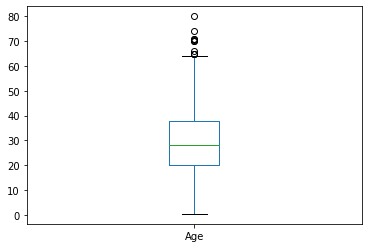

In [126]:
df_titanic.Age.plot.box()

In [125]:
#descrição
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [127]:
#Info
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [128]:
#media
df_titanic.mean()

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

In [129]:
df_titanic.Age.mean()

29.69911764705882

In [130]:
#desvio padrao
df_titanic.std()

PassengerId    257.353842
Survived         0.486592
Pclass           0.836071
Age             14.526497
SibSp            1.102743
Parch            0.806057
Fare            49.693429
dtype: float64

In [132]:
#moda
df_titanic.Age.mode()

0    24.0
dtype: float64

In [134]:
#max
df_titanic.Age.max()

80.0

In [135]:
#min
df_titanic.Age.min()

0.42

In [136]:
#value_counts
df_titanic.Age.value_counts()

24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
30.00    25
21.00    24
25.00    23
36.00    22
29.00    20
35.00    18
32.00    18
27.00    18
26.00    18
16.00    17
31.00    17
33.00    15
34.00    15
23.00    15
20.00    15
39.00    14
42.00    13
40.00    13
17.00    13
45.00    12
         ..
59.00     2
70.00     2
63.00     2
28.50     2
71.00     2
13.00     2
57.00     2
55.00     2
45.50     2
24.50     1
66.00     1
20.50     1
0.67      1
80.00     1
14.50     1
34.50     1
23.50     1
53.00     1
36.50     1
0.42      1
55.50     1
74.00     1
0.92      1
70.50     1
12.00     1
Name: Age, Length: 88, dtype: int64

In [137]:
df_titanic.Age.value_counts().sort_index()

0.42      1
0.67      1
0.75      2
0.83      2
0.92      1
1.00      7
2.00     10
3.00      6
4.00     10
5.00      4
6.00      3
7.00      3
8.00      4
9.00      8
10.00     2
11.00     4
12.00     1
13.00     2
14.00     6
14.50     1
15.00     5
16.00    17
17.00    13
18.00    26
19.00    25
         ..
48.00     9
49.00     6
50.00    10
51.00     7
52.00     6
53.00     1
54.00     8
55.00     2
55.50     1
56.00     4
57.00     2
58.00     5
59.00     2
60.00     4
61.00     3
62.00     4
63.00     2
64.00     2
65.00     3
66.00     1
70.00     2
70.50     1
71.00     2
74.00     1
80.00     1
Name: Age, Length: 88, dtype: int64

<AxesSubplot:ylabel='Frequency'>

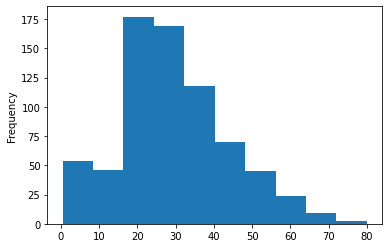

In [138]:
df_titanic.Age.plot.hist()

In [141]:
df_titanic.Age.describe()['25%']

20.125

In [143]:
df_titanic.Age.quantile(0.25)

20.125

In [144]:
df_titanic.Age.quantile(0.1)

14.0

In [148]:
#isin
df_titanic.Age.isin(list(range(40, 50)))

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
       ...  
866    False
867    False
868    False
869    False
870    False
871     True
872    False
873     True
874    False
875    False
876    False
877    False
878    False
879    False
880    False
881    False
882    False
883    False
884    False
885    False
886    False
887    False
888    False
889    False
890    False
Name: Age, Length: 891, dtype: bool

### Problema 1
Com base no dataset 'Video_Games_Sales.csv' responda:
1. Quantos jogos existem em cada genero?
2. Quantos jogos de cada editora receberam nota acima de 9 na avaliação dos usuarios?
3. Faça uma tabela que mostre o total vendido por ano por pais/globalmente de cada editora?
4. Qual foi jogo mais vendido na união européia? De que ano ele é e qual a editora?
5. Quantos % os generos ['Racing', 'Sports', 'Shooter'] representam na base de dados? Obs: a porcertagem deve ser impressa usando 2 casas decimais e o simbolo de %..Ex: 45.13% ..lembrando que 45.127 = 45.13%
6. Qual plataforma vendeu menos globalmente? obs: imprimir somente o nome

In [149]:
df = pd.read_csv('../datasets/Video_Games_Sales.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
#1. Quantos jogos existem em cada genero?

In [ ]:
# exploratory data analysis

In [151]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [153]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

In [154]:
df[df.Genre.isna()]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
659,NaN,GEN,1993.0,NaN,Acclaim Entertainment,1.78,0.53,0.00,0.08,2.39,NaN,NaN,NaN,NaN,NaN,NaN
14246,NaN,GEN,1993.0,NaN,Acclaim Entertainment,0.00,0.00,0.03,0.00,0.03,NaN,NaN,NaN,NaN,NaN,NaN


In [155]:
df.dropna(subset=['Genre'], inplace=True)

In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16717 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16717 non-null  object 
 2   Year_of_Release  16448 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16663 non-null  object 
 5   NA_Sales         16717 non-null  float64
 6   EU_Sales         16717 non-null  float64
 7   JP_Sales         16717 non-null  float64
 8   Other_Sales      16717 non-null  float64
 9   Global_Sales     16717 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.2+ MB


In [158]:
df.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16448.000000,16717.000000,16717.000000,16717.000000,16717.000000,16717.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.488996,0.263255,0.145010,0.077610,0.047333,0.533462,68.967679,26.360821,7.125046,162.229908
std,5.877470,0.813475,0.503303,0.308836,0.186721,1.547956,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


In [159]:
df.Genre.unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

In [169]:
df[df.Name == 'Dance Dance Revolution 3rdMix']

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5227,Dance Dance Revolution 3rdMix,PS,2000.0,Simulation,Konami Digital Entertainment,0.0,0.0,0.33,0.02,0.36,NaN,NaN,NaN,NaN,NaN,NaN


In [162]:
df.Name.value_counts()

Need for Speed: Most Wanted                       12
Ratatouille                                        9
LEGO Marvel Super Heroes                           9
FIFA 14                                            9
Madden NFL 07                                      9
Terraria                                           8
LEGO The Hobbit                                    8
The LEGO Movie Videogame                           8
FIFA Soccer 13                                     8
Angry Birds Star Wars                              8
LEGO Harry Potter: Years 5-7                       8
LEGO Star Wars II: The Original Trilogy            8
Cars                                               8
LEGO Jurassic World                                8
Monopoly                                           8
FIFA 15                                            8
Madden NFL 08                                      8
Lego Batman 3: Beyond Gotham                       8
LEGO Batman 2: DC Super Heroes                

In [161]:
df.count()

Name               16717
Platform           16717
Year_of_Release    16448
Genre              16717
Publisher          16663
NA_Sales           16717
EU_Sales           16717
JP_Sales           16717
Other_Sales        16717
Global_Sales       16717
Critic_Score        8137
Critic_Count        8137
User_Score          7590
User_Count          7590
Developer          10096
Rating              9950
dtype: int64

In [160]:
df.Genre.value_counts()

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

#### Solução

### Problema 2

O Dataset do Titanic apresenta 2 Locais de embarque que estão com valores nulos

Adote a melhor solução para resolver essas 2 linhas do Dataset

#### Solução

In [14]:
df_titanic = pd.read_csv('../datasets/titanic.csv')

In [16]:
df_titanic[df_titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [18]:
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [19]:
df_titanic[df_titanic.Embarked.isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [20]:
df_titanic['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [21]:
df_titanic.groupby(['Pclass','Survived','Embarked']).agg(['count'])

PassengerId  Name   Sex   Age SibSp Parch Ticket  \
                               count count count count count count  count   
Pclass Survived Embarked                                                    
1      0        C                 26    26    26    21    26    26     26   
                Q                  1     1     1     1     1     1      1   
                S                 53    53    53    42    53    53     53   
       1        C                 59    59    59    53    59    59     59   
                Q                  1     1     1     1     1     1      1   
                S                 74    74    74    66    74    74     74   
2      0        C                  8     8     8     7     8     8      8   
                Q                  1     1     1     1     1     1      1   
                S                 88    88    88    82    88    88     88   
       1        C                  9     9     9     8     9     9      9   
                Q                  2     2     2     1     2     2      2   
                S                 76    76    76    74    76    76     76   
3      0        C                 41    41    41    23    41    41     41   
                Q                 45    45    45    18    45    45     45   
                S                286   286   286   229   286   286    286   
       1        C                 25    25    25    18    25    25     25   
                Q                 27    27    27     6    27    27     27   
                S                 67    67    67    61    67    67     67   

                          Fare Cabin  
                         count count  
Pclass Survived Embarked              
1      0        C           26    16  
                Q            1     1  
                S           53    42  
       1        C           59    50  
                Q            1     1  
                S           74    64  
2      0        C            8     1  
                Q            1     0  
                S           88     2  
       1        C            9     1  
                Q            2     1  
                S           76    11  
3      0        C           41     0  
                Q           45     1  
                S          286     5  
       1        C           25     1  
                Q           27     0  
                S           67     5

In [23]:
df_pivot = pd.pivot_table(df_titanic,values='Survived',index='Embarked',columns='Sex',aggfunc=np.mean)
df_pivot

Sex,female,male
Embarked,,
C,0.876712,0.305263
Q,0.750000,0.073171
S,0.689655,0.174603


In [24]:
df_titanic[(df_titanic['Survived']==1) &(df_titanic['Pclass']==1)&(df_titanic['Sex']=='female') &(df_titanic['Age']==38)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0000,B28,NaN
716,717,1,1,"Endres, Miss. Caroline Louise",female,38.0,0,0,PC 17757,227.5250,C45,C


In [25]:
df_titanic[df_titanic['Ticket'] == '113572']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [26]:
df_titanic[df_titanic['Fare'] == 80]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [27]:
df_titanic[df_titanic['Cabin'] == 'B28']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [28]:
df_pivot = pd.pivot_table(df_titanic[df_titanic['Sex']=='female'],values='Survived',index='Embarked',columns='Pclass',aggfunc=np.mean)
df_pivot

Pclass,1,2,3
Embarked,,,
C,0.976744,1.000000,0.652174
Q,1.000000,1.000000,0.727273
S,0.958333,0.910448,0.375000


### Renomeando colunas

### Salvar formato csv e xlsx

### Problema 3
Insira uma coluna ao lado direito do nome do passageiro com o seu título: Ex:
Braund, Mr. Owen Harris -> Mr.

#### Solução

In [29]:
df_titanic['Name'].apply(lambda values: values.split(',')[1])

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: Name, Length: 891, dtype: object

In [31]:
df_titanic['Name'].apply(lambda x: x[x.index(',')+1:x.index('.')+1].strip())

0        Mr.
1       Mrs.
2      Miss.
3       Mrs.
4        Mr.
       ...  
886     Rev.
887    Miss.
888    Miss.
889      Mr.
890      Mr.
Name: Name, Length: 891, dtype: object